In [1]:
from keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
K.clear_session()
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
#モデルの読み込み
model_file_2_3keV='/home/tsato/work/machine_learning/CNN/1orbit/2-3keV_5000/model_.09-0.07.hdf5'
model_2_3keV=load_model(model_file_2_3keV)
model_file_3_10keV='/home/tsato/work/machine_learning/CNN/1orbit/3-10keV_5000/model_.05-0.04.hdf5'
model_3_10keV=load_model(model_file_3_10keV)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [ ]:
"""
2-3keVで判定をおこなう

"""

In [3]:
import os
flare_dir_2_3keV='/home/tsato/work/machine_learning/CNN/images/1orbit/2-3keV_5000/test/flare'
flare_images_2_3keV = os.listdir(flare_dir_2_3keV)


In [4]:
#評価
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd

df = []
for jpeg_name in flare_images_2_3keV:
    img_path = (jpeg_name)
    img = img_to_array(load_img(flare_dir_2_3keV + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model_2_3keV.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    list=[int(a[0]),jpeg_name,1,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
flare_result_2_3keV=result

In [5]:
bgd_dir_2_3keV='/home/tsato/work/machine_learning/CNN/images/1orbit/2-3keV_5000/test/background/'
bgd_images_2_3keV = os.listdir(bgd_dir_2_3keV)

In [6]:
df = []
for jpeg_name in bgd_images_2_3keV:
    img_path = (jpeg_name)
    img = img_to_array(load_img(bgd_dir_2_3keV + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model_2_3keV.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    #list=[int(a[0]),jpeg_name,pred_label,score]  
    list=[int(a[0]),jpeg_name,0,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
bgd_result_2_3keV=result

In [ ]:
"""
3-10keVで判定をおこなう

"""

In [7]:
flare_dir_3_10keV='/home/tsato/work/machine_learning/CNN/images/1orbit/3-10keV_5000/test/flare'
flare_images_3_10keV = os.listdir(flare_dir_3_10keV)

In [8]:
#評価
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd

df = []
for jpeg_name in flare_images_3_10keV:
    img_path = (jpeg_name)
    img = img_to_array(load_img(flare_dir_3_10keV + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model_3_10keV.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    list=[int(a[0]),jpeg_name,1,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
flare_result_3_10keV=result

In [9]:
bgd_dir_3_10keV='/home/tsato/work/machine_learning/CNN/images/1orbit/3-10keV_5000/test/background/'
bgd_images_3_10keV = os.listdir(bgd_dir_3_10keV)

In [10]:
df = []
for jpeg_name in bgd_images_3_10keV:
    img_path = (jpeg_name)
    img = img_to_array(load_img(bgd_dir_3_10keV + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model_3_10keV.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    #list=[int(a[0]),jpeg_name,pred_label,score]  
    list=[int(a[0]),jpeg_name,0,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
bgd_result_3_10keV=result

In [11]:
flare_result=pd.concat([flare_result_2_3keV,flare_result_3_10keV])

In [12]:
bgd_result=pd.concat([bgd_result_2_3keV,bgd_result_3_10keV])

In [13]:
#0=bgd,1=flare
b_true = bgd_result[2].to_numpy()
f_true = flare_result[2].to_numpy()
true=np.hstack((b_true, f_true))
b_score = bgd_result[4].to_numpy()
f_score = flare_result[4].to_numpy()
score=np.hstack((b_score, f_score))

In [14]:
from sklearn.metrics import roc_curve
roc = roc_curve(true, score)
fpr, tpr, thresholds = roc_curve(true, score)

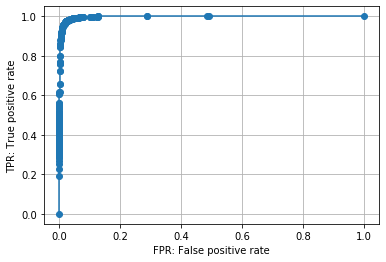

In [15]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('data/dst/sklearn_roc_curve.png')

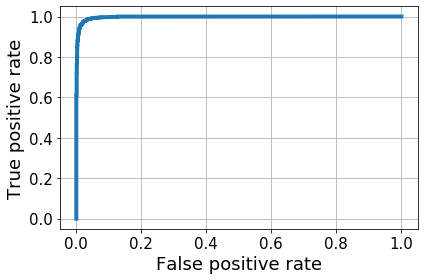

In [53]:
fpr_all, tpr_all, thresholds_all = roc_curve(true, score,
                                             drop_intermediate=False)
plt.plot(fpr_all, tpr_all, marker='',ls="-",linewidth = 4.0)
plt.xlabel('False positive rate',fontsize=18)
plt.ylabel('True positive rate',fontsize=18)

plt.tick_params(labelsize=15)
plt.grid()
plt.tight_layout()

plt.savefig('roc.png')

In [17]:
from sklearn import metrics
auc = metrics.roc_auc_score(true, score)
print(auc)

#fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score)
auc = metrics.auc(fpr_all, tpr_all)
print(auc)

0.9972807499999999
0.9972807499999999


In [18]:
#recall
from sklearn.metrics import recall_score
print(recall_score(true, score >= 0.99))
#precision
from sklearn.metrics import precision_score
print(precision_score(true, score >=0.99))
#f-score
from sklearn.metrics import f1_score
print(f1_score(true,score >=0.99))

0.8385
0.9970273483947681
0.9109179793590441


In [33]:
Prob_bgd=bgd_result.iloc[:,3]
Prob_flare=flare_result.iloc[:,3]
import matplotlib.pyplot as plt

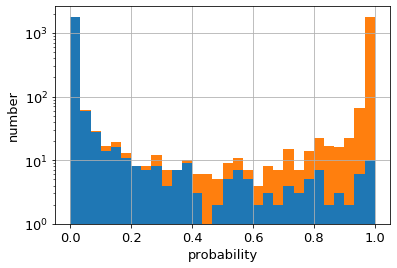

In [37]:
plt.hist([Prob_bgd,Prob_flare],bins=30,stacked=True)
plt.grid(True)
plt.gca().set_yscale("log")
plt.tick_params(labelsize=13)
plt.xlabel('probability',size=13)
plt.ylabel('number',size=13)
plt.savefig('hist.png')

'/home/tsato/work/machine_learning/CNN/images/1orbit/2-3keV_5000/test/background/'